# **Disease prediction.**
---
Cardiovascular disease are among the leading causes of death worldwide, impacting millions of people each year. They are often associated with risk factors such as high blood pressure, diabetes, smoking, and unhealthy lofestyle choises, which contribute to their development and progression.

Maschine learning has emerged as a powerful tool across various fields, particularly in healthcare, where it plays a vital role in diagnosing, predicting, and treating diseases. This report explores the application of ML in predicting cardiovascular diseases, highlightingits potensial to enhace early detection, risk assessment, and patient outcomes.

## Exploratory Data Analysis.
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import utils as utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ml_models import Disease_Prediction

In [ ]:
#from IPython.display import clear_output
#clear_output(wait=True)

In [5]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


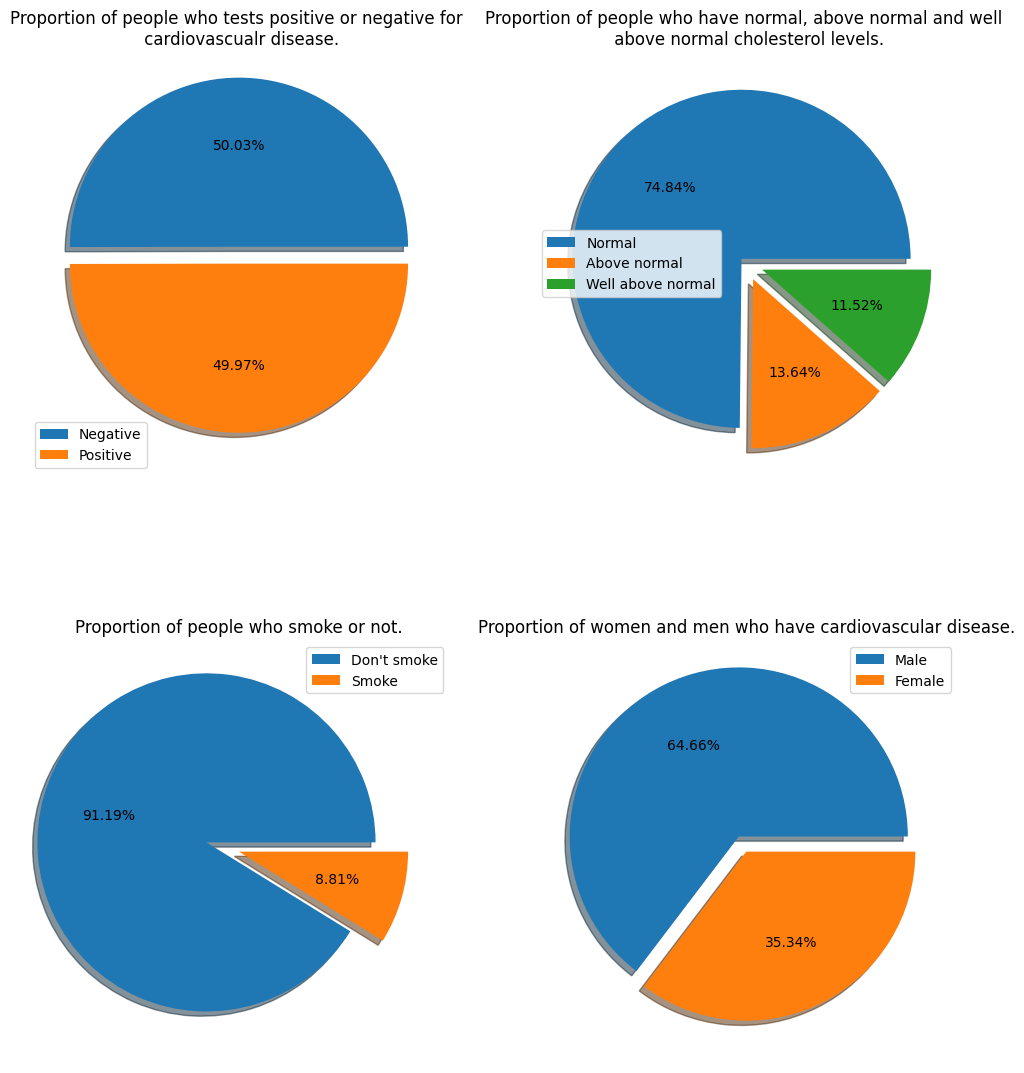

In [ ]:
utils.eda_pieplot(df)

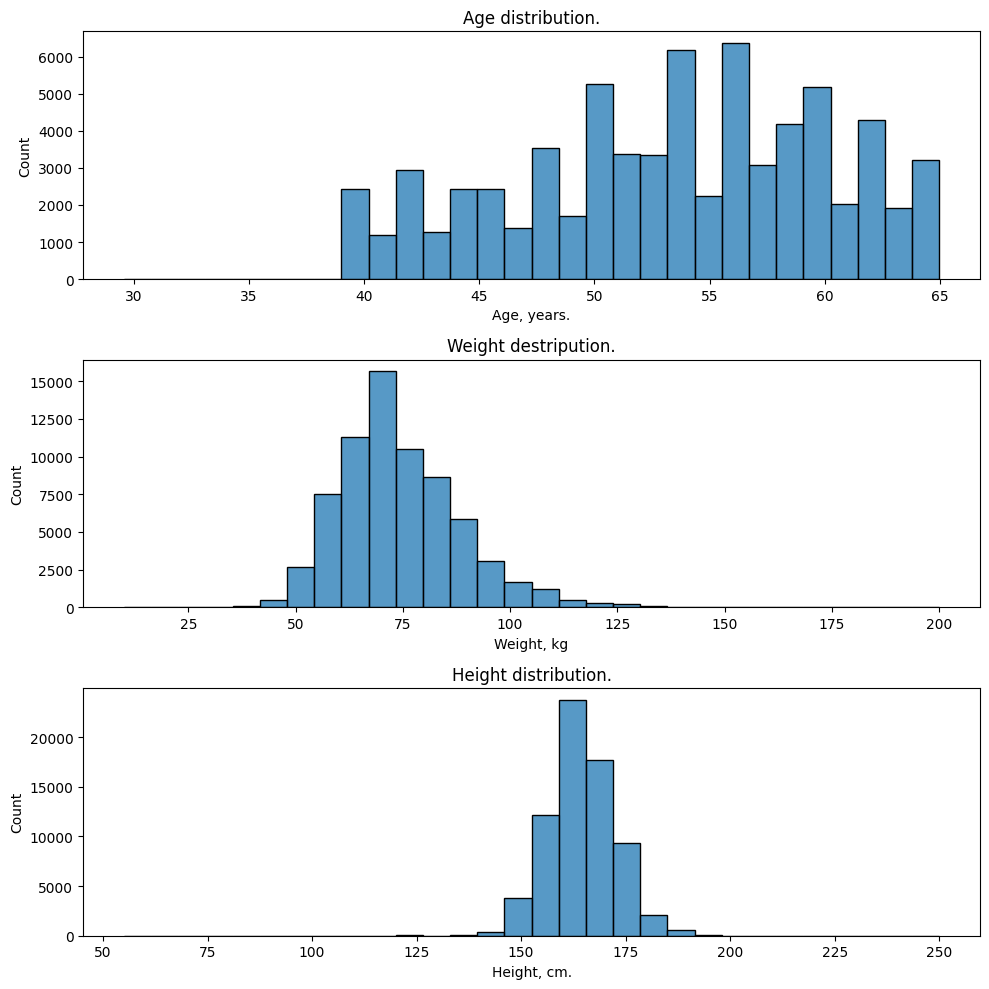

In [ ]:
utils.eda_histplot(df)

### Feature Engineering BMI.
---

In [ ]:
utils.bmi(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [9]:
# outliers bmi
Q1, Q3 = np.quantile(df['bmi'], 0.25), np.quantile(df['bmi'], 0.75)
IQR = Q3 - Q1
threshold = 3
df = df[(df['bmi'] >= Q1 - threshold * IQR) & ( df['bmi'] <= Q3 + threshold * IQR)]

In [ ]:
utils.bmi_cat(df)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000,69683.000000
mean,19468.408550,1.350258,164.452564,73.993165,128.784424,96.514788,1.365943,1.225392,0.088286,0.053772,0.803725,0.498945,27.381255
std,2467.543134,0.477054,7.869558,13.900839,154.352248,188.488164,0.679488,0.571060,0.283712,0.225569,0.397181,0.500002,5.025517
min,10798.000000,1.000000,98.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


In [11]:
### ?????????????????

df = df[df['bmi'] >= 12]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000
mean,19468.346092,1.350254,164.452352,73.996666,128.784911,96.515973,1.365926,1.225394,0.088278,0.053762,0.803711,0.498938,27.382574
std,2467.555144,0.477053,7.869573,13.895149,154.357725,188.494867,0.679497,0.571071,0.283700,0.225548,0.397192,0.500002,5.023270
min,10798.000000,1.000000,98.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19702.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21326.750000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


## Feature Engineering Blood Pressure.
---

In [12]:
# outliers ap_hi
Q1, Q3 = np.quantile(df['ap_hi'], 0.25), np.quantile(df['ap_hi'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_hi'] >= Q1 - threshold * IQR) & ( df['ap_hi'] <= Q3 + threshold * IQR)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68269 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68269 non-null  int64   
 1   gender       68269 non-null  int64   
 2   height       68269 non-null  int64   
 3   weight       68269 non-null  float64 
 4   ap_hi        68269 non-null  int64   
 5   ap_lo        68269 non-null  int64   
 6   cholesterol  68269 non-null  int64   
 7   gluc         68269 non-null  int64   
 8   smoke        68269 non-null  int64   
 9   alco         68269 non-null  int64   
 10  active       68269 non-null  int64   
 11  cardio       68269 non-null  int64   
 12  bmi          68269 non-null  float64 
 13  bmi_cat      67636 non-null  category
dtypes: category(1), float64(2), int64(11)
memory usage: 7.4 MB


In [14]:
# outliers ap_lo
Q1, Q3 = np.quantile(df['ap_lo'], 0.25), np.quantile(df['ap_lo'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_lo'] >= Q1 - threshold * IQR) & ( df['ap_lo'] <= Q3 + threshold * IQR)]

In [15]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 63700 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63700 non-null  int64   
 1   gender       63700 non-null  int64   
 2   height       63700 non-null  int64   
 3   weight       63700 non-null  float64 
 4   ap_hi        63700 non-null  int64   
 5   ap_lo        63700 non-null  int64   
 6   cholesterol  63700 non-null  int64   
 7   gluc         63700 non-null  int64   
 8   smoke        63700 non-null  int64   
 9   alco         63700 non-null  int64   
 10  active       63700 non-null  int64   
 11  cardio       63700 non-null  int64   
 12  bmi          63700 non-null  float64 
 13  bmi_cat      63700 non-null  category
dtypes: category(1), float64(2), int64(11)
memory usage: 6.9 MB


In [ ]:
utils.pressure_cat(df)

df.head()
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000
mean,19496.984192,1.352637,164.532182,74.289073,126.665212,81.808760,1.364615,1.225573,0.087567,0.053093,0.803171,0.499451,27.468352
std,2456.526027,0.477795,7.797830,13.525922,14.364277,7.704527,0.680566,0.572664,0.282666,0.224220,0.397605,0.500004,4.897392
min,10859.000000,1.000000,120.000000,30.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,17735.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19719.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21345.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,198.000000,180.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


## Visualization of Diseases Proportions.
---

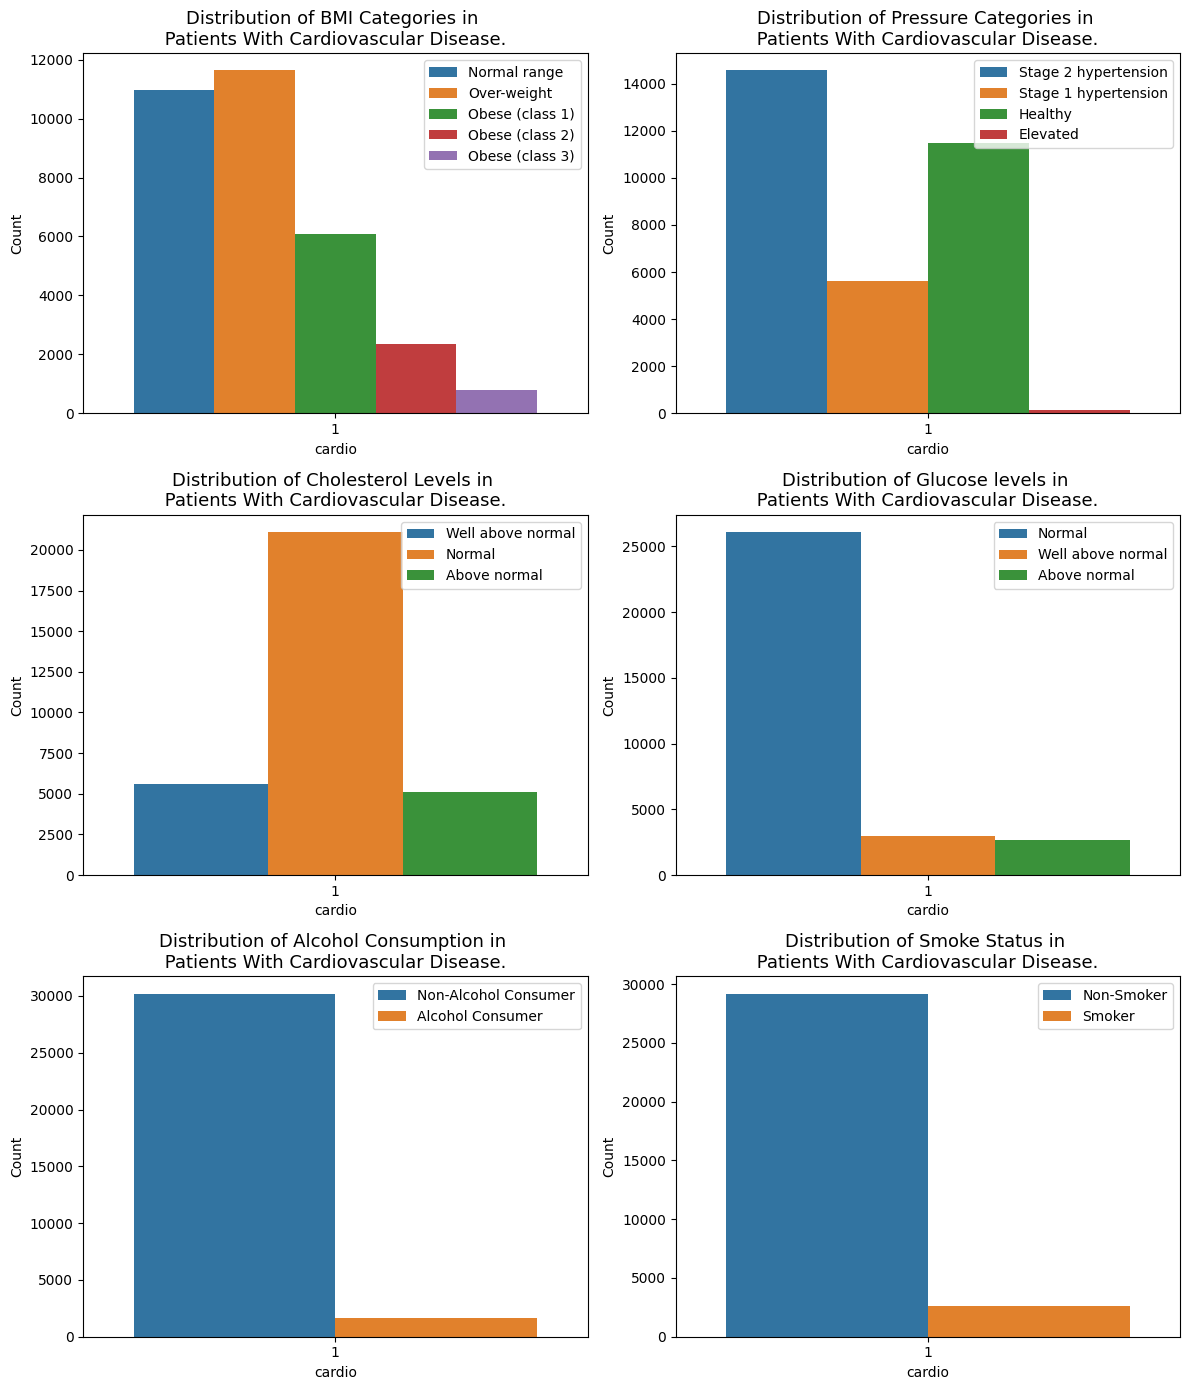

In [ ]:
utils.plot_disease(df);


## Visualization of Correlation.
---

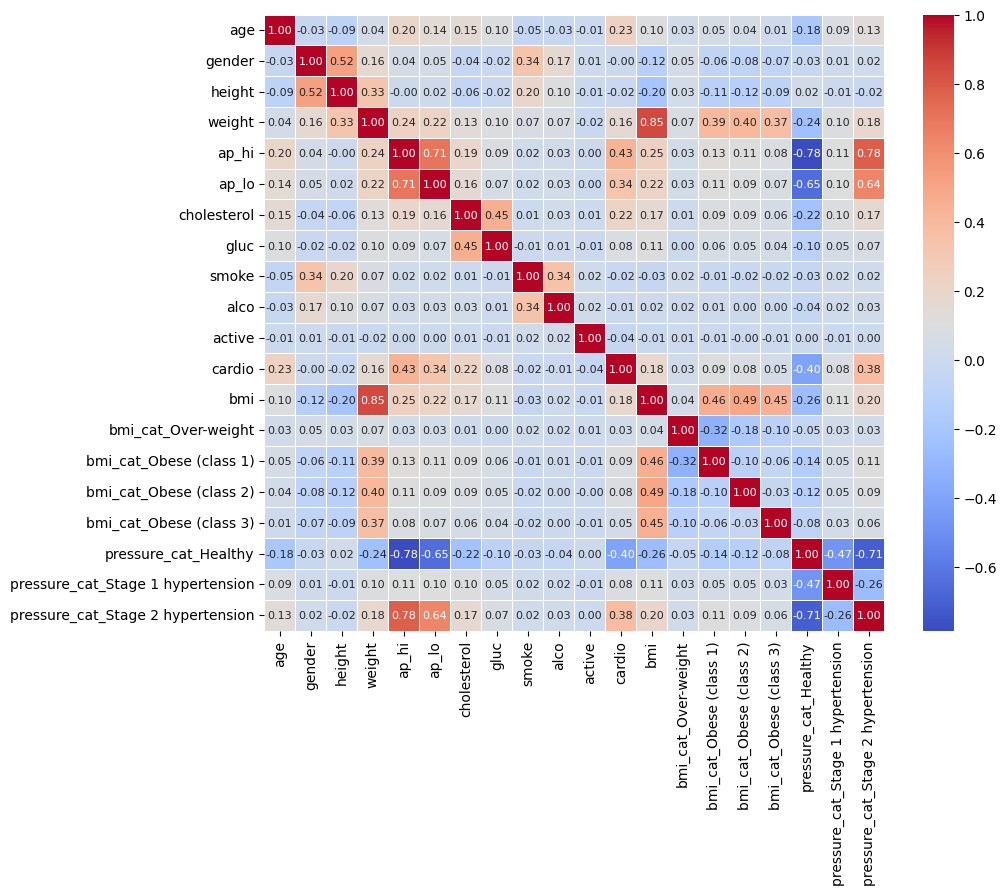

In [ ]:
utils.plot_heat(df);

## Creating two datasets.
---

In [19]:
df_new = df.copy()

In [20]:
df_new_01 = df_new.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])
df_new_01 = pd.get_dummies(df_new_01, columns = ["bmi_cat", 'pressure_cat',  "gender"], drop_first=True)
df_new_01.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_cat_Over-weight,bmi_cat_Obese (class 1),bmi_cat_Obese (class 2),bmi_cat_Obese (class 3),pressure_cat_Healthy,pressure_cat_Stage 1 hypertension,pressure_cat_Stage 2 hypertension,gender_2
id,,,,,,,,,,,,,,,
0,18393,1,1,0,0,1,0,False,False,False,False,True,False,False,True
1,20228,3,1,0,0,1,1,False,True,False,False,False,False,True,False
2,18857,3,1,0,0,0,1,False,False,False,False,False,True,False,False
3,17623,1,1,0,0,1,1,True,False,False,False,False,False,True,True
8,21914,2,2,0,0,0,0,True,False,False,False,True,False,False,False


In [21]:
df_new_02 = df_new.drop(columns=['bmi_cat', 'pressure_cat', 'height', 'weight'])
df_new_02 = pd.get_dummies(df_new_02, columns = ["gender"], drop_first=True)
df_new_02.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
id,,,,,,,,,,,
0,18393,110,80,1,1,0,0,1,0,22.0,True
1,20228,140,90,3,1,0,0,1,1,35.0,False
2,18857,130,70,3,1,0,0,0,1,24.0,False
3,17623,150,100,1,1,0,0,1,1,29.0,True
8,21914,120,80,2,2,0,0,0,0,29.0,False


## Machine Learning Models.
---

## DF_NEW_01
---

#### Logistic regression.
---

Accuracy: 0.707
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     10460
           1       0.74      0.64      0.69     10561

    accuracy                           0.71     21021
   macro avg       0.71      0.71      0.71     21021
weighted avg       0.71      0.71      0.71     21021



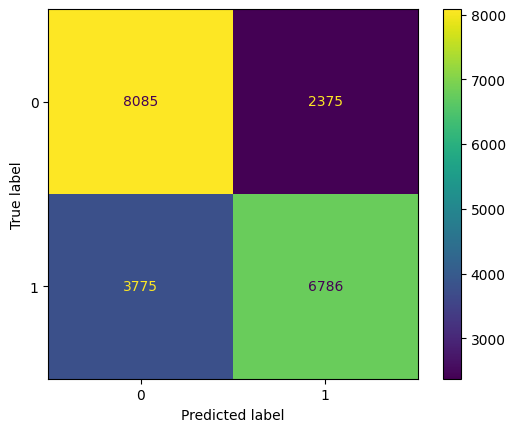

In [22]:
model = Disease_Prediction(df_new_01, 'cardio')
model.log_reg(StandardScaler())

### KNN
---

Accuracy: 0.707
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10460
           1       0.73      0.66      0.69     10561

    accuracy                           0.71     21021
   macro avg       0.71      0.71      0.71     21021
weighted avg       0.71      0.71      0.71     21021



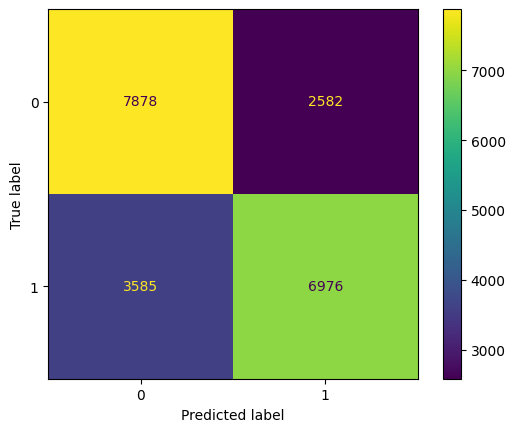

In [23]:
model.KNN(MinMaxScaler())

# DF_NEW_02
---

### Logistic regression.
---

Accuracy: 0.717
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10460
           1       0.75      0.66      0.70     10561

    accuracy                           0.72     21021
   macro avg       0.72      0.72      0.72     21021
weighted avg       0.72      0.72      0.72     21021



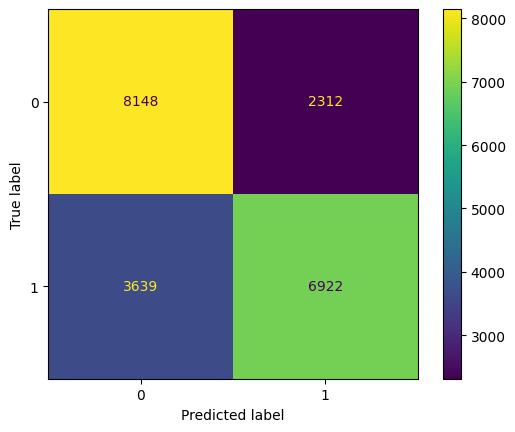

In [24]:
model_02 = Disease_Prediction(df_new_02, 'cardio')
model_02.log_reg(StandardScaler())

### KNN
---

Accuracy: 0.716
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10460
           1       0.74      0.67      0.70     10561

    accuracy                           0.72     21021
   macro avg       0.72      0.72      0.72     21021
weighted avg       0.72      0.72      0.72     21021



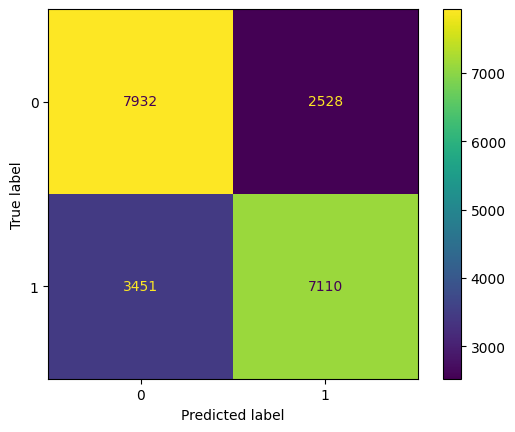

In [25]:
model_02.KNN(MinMaxScaler())